# Deep Learning Case Study: The Otto Group part 2

### 1. Continuing the previous notebook...

In [1]:
import warnings
warnings.filterwarnings("ignore")
%run ottogroup_initial.ipynb

dimensions input: 61878 (observations) x 93 (features)
Number of classes: 9
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 846       
                                                                 
 activation (Activation)     (None, 9)                 0         
                                                                 
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


2021-12-07 23:14:06.784618: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1934/1934 [==============================] - 2s 688us/step - loss: 1.9909
Predicted probabilities [0.09968571 0.10141343 0.08751141 0.1045236  0.10176985 0.1746035
 0.12478039 0.10015316 0.10555903]
Nbr of samples in test: 144368


The number of parameters of our mode is equal to: $9$ nodes on hidden layers $\times$ $93$ input features + $1$ bias per node $\times$ $9$ = $846$

### 2. Cross Validation

Splitting the training data into training (85%) and test (15%) using the <b>train_test_split</b> method of the sklearn.model_selection module.

In [2]:
# Sklearn model seclection module "train_test_split" allow us to easily split the data in train/validation sets
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size=0.15, random_state=42)

In [4]:
print('Nbr of samples in training:',X_train.shape[0])
print('Nbr of sample in test:',X_val.shape[0])

Nbr of samples in training: 52596
Nbr of sample in test: 9282


### 3. Adding a batch size

In the fit method of the model we can now pass both training / test data.<br>
The <b>batch size</b> is set to 128. This means that the weights are only changed after processing 128 items in the list.<br>
The <b>epoch</b> is set to 5, which means that the whole data-set passes 5 times through the backpropagation.

In [5]:
model.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 );

Epoch 1/5
411/411 [==============================] - 0s 1ms/step - loss: 1.8693 - val_loss: 1.8553
Epoch 2/5
411/411 [==============================] - 0s 886us/step - loss: 1.8497 - val_loss: 1.8375
Epoch 3/5
411/411 [==============================] - 0s 894us/step - loss: 1.8333 - val_loss: 1.8223
Epoch 4/5
411/411 [==============================] - 0s 885us/step - loss: 1.8194 - val_loss: 1.8092
Epoch 5/5
411/411 [==============================] - 0s 847us/step - loss: 1.8071 - val_loss: 1.7977


There are now two loss items:

* _loss_
* _val-loss_

<h3>4. Setting Initial Weights</h3>
<br>
We are in full control over the construction of the network. The initialisation of the weights (setting them to zero in this case) is an example of this.

In [6]:
from tensorflow.keras import initializers

model_zero = Sequential()
model_zero.add(Dense(nb_classes, input_shape=(dims[1],), 
                     kernel_initializer=initializers.zeros(), 
                     activation='sigmoid'))
model_zero.add(Activation('softmax'))
model_zero.compile(optimizer='sgd', loss='categorical_crossentropy')

In [7]:
model_zero.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128) ;

Epoch 1/5
411/411 [==============================] - 1s 1ms/step - loss: 2.0801 - val_loss: 1.9990
Epoch 2/5
411/411 [==============================] - 0s 875us/step - loss: 1.9618 - val_loss: 1.9249
Epoch 3/5
411/411 [==============================] - 0s 872us/step - loss: 1.9069 - val_loss: 1.8830
Epoch 4/5
411/411 [==============================] - 0s 886us/step - loss: 1.8726 - val_loss: 1.8545
Epoch 5/5
411/411 [==============================] - 0s 887us/step - loss: 1.8479 - val_loss: 1.8328


### 5. Setting constraints on the weights

In [8]:
# Import the constraint module
from tensorflow.keras.constraints import MaxNorm

In [9]:
model_zero = Sequential()
model_zero.add(Dense(nb_classes, input_shape=(dims[1],), 
                     kernel_initializer=initializers.zeros(), 
                     activation='sigmoid'))
model_zero.add(Activation('softmax'))
model_zero.compile(optimizer='sgd', loss='categorical_crossentropy')

### 6. Adding Callback Functions
Adding callback function 

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#### 6.1 Callback: Early Stopping<br>
This is call back function that is such that the model stops improving as soon
as two consecutive times, the loss function (=val loss) has not improved or stayed the same. Two parameters are defined with the model:
<ul>
<li>patience: number of epochs with no improvement after which training will be stopped.
<li>monitor:monitor: quantity to be monitored.
    </ul>

In [11]:
# Import the call back
from tensorflow.keras.callbacks import EarlyStopping

# Declare the callback
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

#### Callback: Model Checkpoints
The intermediate networks (with temporary weights) are stored on the filepath (fBestModel) in a hdf5 format
it is then afterwards possible to load models from this

In [12]:
# Import the call back
from tensorflow.keras.callbacks import ModelCheckpoint

# Declare the callback
fBestModel = './models/weights.{epoch:02d}-{val_loss:.2f}.hdf5' 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

#### Add the callback functions to the fit method

In [13]:
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
          epochs=15, 
          batch_size=128, verbose=True, 
          callbacks=[best_model, early_stop]);

Epoch 1/15
411/411 [==============================] - 0s 1ms/step - loss: 1.7963 - val_loss: 1.7874
Epoch 2/15
411/411 [==============================] - 0s 1ms/step - loss: 1.7866 - val_loss: 1.7781
Epoch 3/15
411/411 [==============================] - 0s 919us/step - loss: 1.7778 - val_loss: 1.7697
Epoch 4/15
411/411 [==============================] - 0s 888us/step - loss: 1.7697 - val_loss: 1.7619
Epoch 5/15
411/411 [==============================] - 0s 902us/step - loss: 1.7623 - val_loss: 1.7547
Epoch 6/15
411/411 [==============================] - 0s 897us/step - loss: 1.7554 - val_loss: 1.7480
Epoch 7/15
411/411 [==============================] - 0s 896us/step - loss: 1.7490 - val_loss: 1.7418
Epoch 8/15
411/411 [==============================] - 0s 931us/step - loss: 1.7430 - val_loss: 1.7359
Epoch 9/15
411/411 [==============================] - 0s 898us/step - loss: 1.7373 - val_loss: 1.7304
Epoch 10/15
411/411 [==============================] - 0s 905us/step - loss: 1.7320 - 

## How do we get the callback functions in the black box

<h3>7. Evolution of the loss </h3><br>
The evoluation of the history of the network can be plotted (after defining the appropriate plotfunction)

In [17]:
# Auxiliary function to plot the loss from the history
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(network_history):
    plt.figure(figsize=(8,8))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    # Both losses are stored as a dictionary in ".history"
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

Since we are running 50 Epochs with batch-sizes of 128, we are going to supress the output of the model on the screen.
But we will make use of the plot function afterwards.

In [18]:
history = model.fit(X_train, Y_train, 
                    validation_data = (X_val, Y_val), 
                    epochs=150,batch_size=1000,
                    callbacks=[best_model, early_stop],
                    verbose=False);

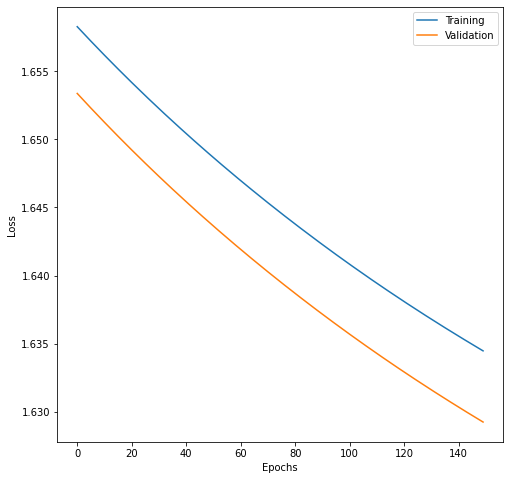

In [19]:
plot_history(history)

<h3>8. Adding a dropout layer</h3>

Introduced in 2014 by Srivastava, et al. in their 2014 paper _Dropout: A Simple Way to Prevent Neural Networks from Overfitting_

Dropout is a technique where randomly selected neurons are ignored during training. They are removed or "dropped-out" at random. 

Dropout is  implemented by randomly selecting nodes to be dropped-out with a given probability (e.g 15%) each weight update cycle (=epoch). Note that dropout is only used during the training of a model and is not used when making predictions with the model.

#### In this example we set a drop layer of 20% just before the first hidden layer. This means that in each feedforward / backpropogation run 20% of the 93 nodes are going to be ignored. 

In [20]:
from tensorflow.keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dropout(0.2, input_shape=(dims[1],)))
model_drop.add(Dense(nb_classes, activation='sigmoid'))
model_drop.add(Activation('softmax'))
model_drop.compile(optimizer='sgd', loss='categorical_crossentropy')

In [21]:
model_drop.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128);

Epoch 1/5
411/411 [==============================] - 1s 1ms/step - loss: 2.1503 - val_loss: 2.0772
Epoch 2/5
411/411 [==============================] - 0s 1ms/step - loss: 2.0442 - val_loss: 1.9888
Epoch 3/5
411/411 [==============================] - 0s 1ms/step - loss: 1.9773 - val_loss: 1.9346
Epoch 4/5
411/411 [==============================] - 0s 1ms/step - loss: 1.9345 - val_loss: 1.8990
Epoch 5/5
411/411 [==============================] - 0s 1ms/step - loss: 1.9052 - val_loss: 1.8732
